# Conv1D

In [7]:
import tensorflow_datasets as tfds
import tensorflow as tf

print(tf.__version__)

2.2.0-rc3


In [0]:
# Get the data
vocab_size=8000
maxLen=250
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(path="imdb.npz", num_words=vocab_size,
skip_top=0, maxlen=maxLen, seed=113, start_char=1, oov_char=2, index_from=3)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxLen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxLen)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128,input_length=maxLen),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 250, 128)          1024000   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 246, 64)           41024     
_________________________________________________________________
global_average_pooling1d_5 ( (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 1,069,249
Trainable params: 1,069,249
Non-trainable params: 0
____________________________________________

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
NUM_EPOCHS = 10
history = model.fit(x_train,y_train, epochs=NUM_EPOCHS, validation_data=(x_test,y_test))

Epoch 1/10
782/782 [==============================] - 12s 15ms/step - loss: 0.3397 - accuracy: 0.8457 - val_loss: 0.2548 - val_accuracy: 0.8932
Epoch 2/10
782/782 [==============================] - 12s 15ms/step - loss: 0.1943 - accuracy: 0.9244 - val_loss: 0.2841 - val_accuracy: 0.8865
Epoch 3/10
782/782 [==============================] - 12s 15ms/step - loss: 0.1468 - accuracy: 0.9478 - val_loss: 0.2916 - val_accuracy: 0.8874
Epoch 4/10
782/782 [==============================] - 12s 16ms/step - loss: 0.1113 - accuracy: 0.9616 - val_loss: 0.3247 - val_accuracy: 0.8837
Epoch 5/10
782/782 [==============================] - 12s 15ms/step - loss: 0.0840 - accuracy: 0.9728 - val_loss: 0.3980 - val_accuracy: 0.8770
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 0.0586 - accuracy: 0.9821 - val_loss: 0.4687 - val_accuracy: 0.8773
Epoch 7/10
782/782 [==============================] - 12s 15ms/step - loss: 0.0458 - accuracy: 0.9863 - val_loss: 0.4994 - val_accuracy:

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

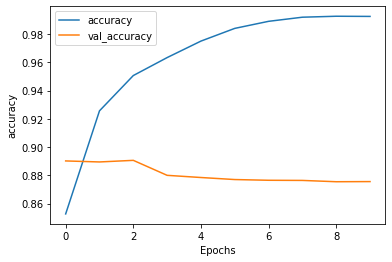

In [0]:
plot_graphs(history, 'accuracy')

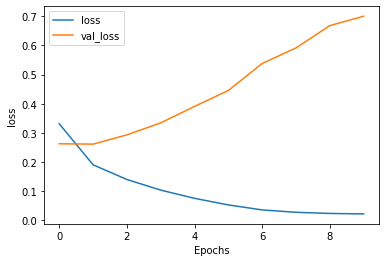

In [0]:
plot_graphs(history, 'loss')